# Train FCN on Building Dataset

In [53]:
import keras
import polars as pl
from keras.src.layers import SimpleRNN

from src.energy_forecast.config import PROCESSED_DATA_DIR

df = pl.read_csv(PROCESSED_DATA_DIR / "dataset_building_interpolate_daily_lag_7_7_feat.csv")
df

id,datetime,diff,hum_avg,hum_min,hum_max,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,daily_avg,heated_area,heated_area_lod,anzahlwhg,ground_surface,building_height,storeys_above_ground,weekend,holiday,diff(t-1),diff(t-2),diff(t-3),diff(t-4),diff(t-5),diff(t-6),diff(t-7),diff(t+1),diff(t+2),diff(t+3),diff(t+4),diff(t+5),diff(t+6),typ_0,typ_1,typ_2,typ_4,primary_energy_district heating,primary_energy_gas,day_of_month_sin,day_of_month_cos,weekday_sin,weekday_cos
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""400284SVG-0""","""2018-03-03T00:00:00.000000""",5523.44,63.833333,47.0,79.0,-6.9,-11.5,-1.7,0.0,70.0,85.0,17.6,37.8,1006.1,588.0,1986.382003,3684.0,null,48.0,null,null,null,1,1,5619.49,5700.85,5604.8,5214.95,4975.39,4987.82,4349.37,5253.37,4001.33,3608.09,3913.19,3669.11,3483.79,1.0,0.0,0.0,0.0,0.0,1.0,0.707107,0.707107,1.0,6.1232e-17
"""400284SVG-0""","""2018-03-04T00:00:00.000000""",5253.37,58.125,45.0,71.0,-2.7,-8.7,2.6,1.8,70.0,104.0,19.1,36.0,1002.2,168.0,1986.382003,3684.0,null,48.0,null,null,null,1,1,5523.44,5619.49,5700.85,5604.8,5214.95,4975.39,4987.82,4001.33,3608.09,3913.19,3669.11,3483.79,3422.77,1.0,0.0,0.0,0.0,0.0,1.0,0.866025,0.5,0.965926,-0.258819
"""400284SVG-0""","""2018-03-05T00:00:00.000000""",4001.33,77.25,53.0,96.0,2.8,-1.6,10.6,0.1,50.0,138.0,14.0,34.9,996.4,330.0,1986.382003,3684.0,null,48.0,null,null,null,0,1,5253.37,5523.44,5619.49,5700.85,5604.8,5214.95,4975.39,3608.09,3913.19,3669.11,3483.79,3422.77,2640.81,1.0,0.0,0.0,0.0,0.0,1.0,0.965926,0.258819,0.258819,0.965926
"""400284SVG-0""","""2018-03-06T00:00:00.000000""",3608.09,77.041667,57.0,96.0,2.0,-3.4,7.6,1.3,0.0,106.0,11.5,28.8,994.3,474.0,1986.382003,3684.0,null,48.0,null,null,null,0,1,4001.33,5253.37,5523.44,5619.49,5700.85,5604.8,5214.95,3913.19,3669.11,3483.79,3422.77,2640.81,2387.69,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6.1232e-17,0.5,0.866025
"""400284SVG-0""","""2018-03-07T00:00:00.000000""",3913.19,94.708333,85.0,98.0,0.5,-0.2,1.2,6.8,0.0,332.0,5.4,14.8,994.9,0.0,1986.382003,3684.0,null,48.0,null,null,null,0,1,3608.09,4001.33,5253.37,5523.44,5619.49,5700.85,5604.8,3669.11,3483.79,3422.77,2640.81,2387.69,2630.64,1.0,0.0,0.0,0.0,0.0,1.0,0.965926,-0.258819,0.707107,0.707107
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""f6f7e866-e013-11eb-9d61-02b402…","""2023-09-08T00:00:00.000000""",245.21,72.25,35.0,100.0,18.9,10.8,28.0,0.0,0.0,108.0,8.7,19.1,1019.5,744.0,636.310798,1201.78,null,64.0,null,null,null,0,1,210.18,211.31,213.57,213.57,215.83,236.17,239.56,229.39,202.27,201.14,205.66,214.7,221.48,0.0,0.0,0.0,1.0,0.0,1.0,0.866025,-0.5,0.965926,0.258819
"""f6f7e866-e013-11eb-9d61-02b402…","""2023-09-09T00:00:00.000000""",229.39,74.291667,32.0,100.0,19.0,10.1,29.6,0.0,0.0,131.0,6.7,16.6,1018.4,738.0,636.310798,1201.78,null,64.0,null,null,null,1,1,245.21,210.18,211.31,213.57,213.57,215.83,236.17,202.27,201.14,205.66,214.7,221.48,238.43,0.0,0.0,0.0,1.0,0.0,1.0,0.707107,-0.707107,1.0,6.1232e-17
"""f6f7e866-e013-11eb-9d61-02b402…","""2023-09-10T00:00:00.000000""",202.27,77.041667,41.0,100.0,20.4,12.3,29.9,0.0,0.0,139.0,5.2,14.8,1018.2,708.0,636.310798,1201.78,null,64.0,null,null,null,1,1,229.39,245.21,210.18,211.31,213.57,213.57,215.83,201.14,205.66,214.7,221.48,238.43,246.34,0.0,0.0,0.0,1.0,0.0,1.0,0.5,-0.866025,0.965926,-0.258819


## Train Test Split

I'll create a stratified train-test split based on the 'id' column to ensure each sensor is represented in both train and test sets with an 80-20 split ratio.

In [58]:
import numpy as np
import pandas as pd

df = df.to_pandas()
# Initialize empty train and test dataframes
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Get unique IDs
unique_ids = df['id'].unique()

# For each ID, split its data 80-20
for id_value in unique_ids:
    id_data = df[df['id'] == id_value]

    # Calculate split point at 80%
    split_idx = int(len(id_data) * 0.8)

    # Split the data for this ID
    train_df = pd.concat([train_df, id_data.iloc[:split_idx]])
    test_df = pd.concat([test_df, id_data.iloc[split_idx:]])

# Reset indices
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Print shapes to verify the split
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

# Verify that all ids are in both sets
print("\nUnique IDs in train:", train_df['id'].nunique())
print("Unique IDs in test:", test_df['id'].nunique())
print("All IDs present in both sets:", set(train_df['id'].unique()) == set(test_df['id'].unique()))

Train shape: (44872, 49)
Test shape: (11291, 49)

Unique IDs in train: 147
Unique IDs in test: 148
All IDs present in both sets: False


This code:
1. Iterates through each unique ID
2. For each ID's data, takes first 80% for training and last 20% for testing
3. Maintains temporal order within each ID's data
4. Ensures each ID is present in both training and test sets


## Training of FCN

In [60]:
from src.energy_forecast.config import FEATURE_SET_2

n_in = 7
n_out = 1
features = list(FEATURE_SET_2 + [f"diff(t-{i})" for i in range(1, n_in + 1)])
features.remove("diff")
target = ["diff" if i == 0 else f"diff(t+{n_out})" for i in range(n_out)]

X_train, y_train = train_df[features], train_df[target]

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(70, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

model.summary()

/home/marja/anaconda3/envs/energy-forecast/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 70)             │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,471 (5.75 KB)

 Trainable params: 1,471 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 803302.8750 - mae: 320.7213 - val_loss: 1302043.3750 - val_mae: 389.3228
Epoch 2/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 794867.1875 - mae: 318.8058 - val_loss: 1355499.3750 - val_mae: 405.8124
Epoch 3/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 858683.2500 - mae: 322.1001 - val_loss: 1305613.6250 - val_mae: 399.0519
Epoch 4/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 858577.3750 - mae: 320.4949 - val_loss: 1309559.3750 - val_mae: 383.5627
Epoch 5/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 695355.0625 - mae: 308.6747 - val_loss: 1285129.7500 - val_mae: 405.6179
Epoch 6/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 743328.1875 - mae: 313.9520 - val_loss: 1461889.1250 - val_mae: 432.1413
Epoch 7/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 801528.3750 - mae: 313.7968 - val_loss: 1583538.8750 - val_mae: 481.4391
Epoch 8/30
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

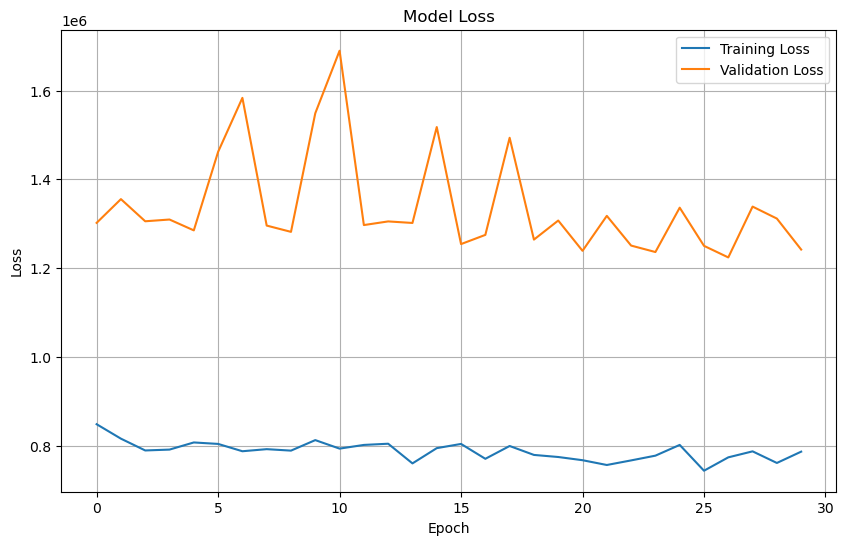

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


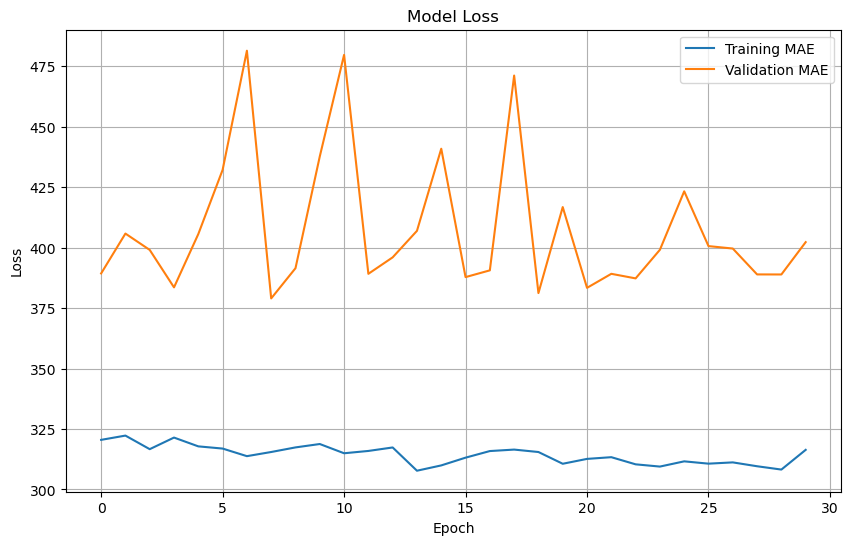

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate model performance

In [71]:
X_test, y_test = test_df[features], test_df[target]
y_hat = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)

# Replace zeros/very small values with 1e-7 to avoid division by zero
y_test_mape = y_test.copy()
y_test_mape[y_test_mape < 1e-7] = 1e-7
mape = np.mean(np.abs((y_test_mape - y_hat) / y_test_mape)) * 100

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')


353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
MSE: 725073.38
RMSE: 851.51
MAE: 306.36
MAPE: 1405575850.02%


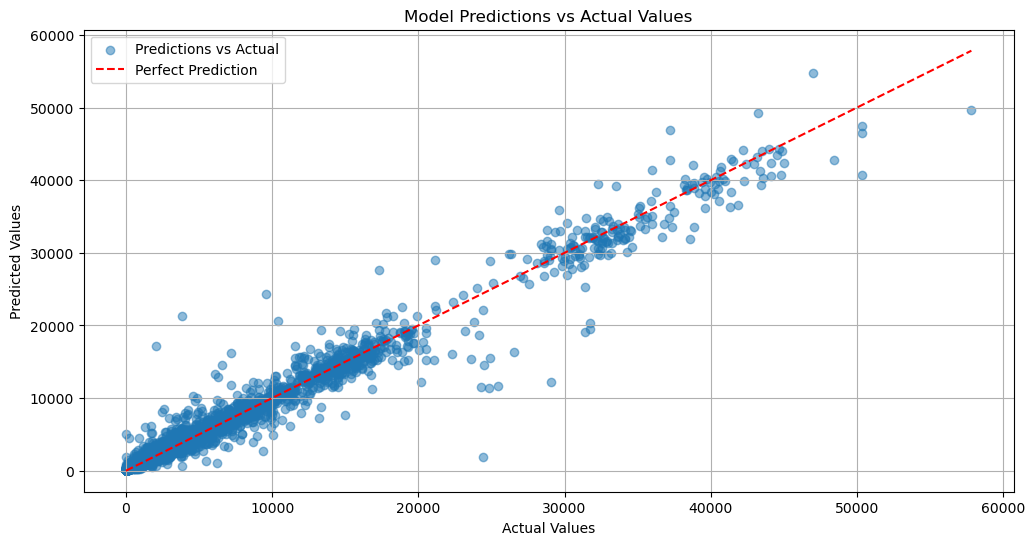

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_hat, alpha=0.5, label='Predictions vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

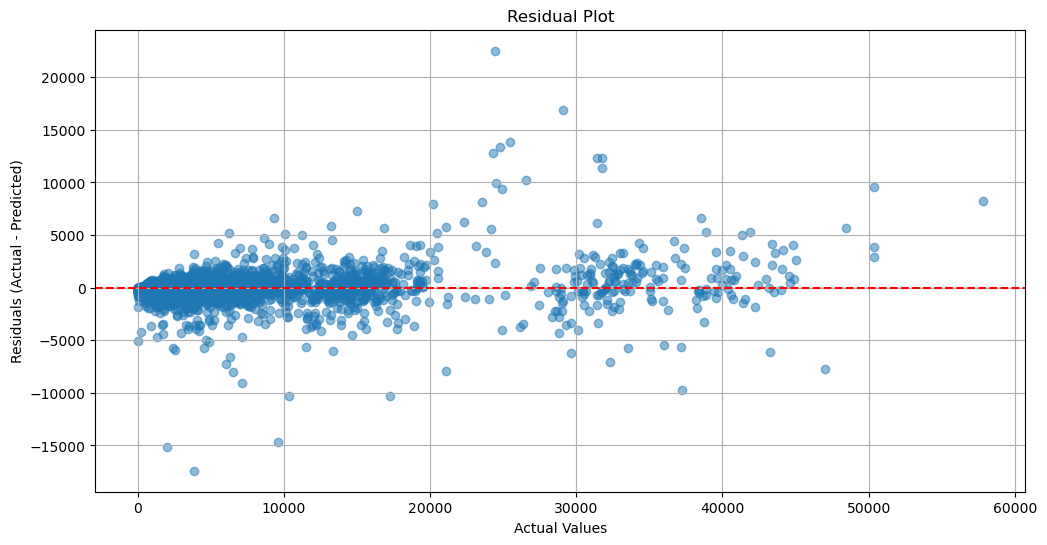

In [73]:
residuals = y_test.values - y_hat
plt.figure(figsize=(12, 6))
plt.scatter(y_test.values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


## Train RNN

In [43]:
X_train

,diff,hum_max,tavg,wspd,wdir,prcp,hum_avg,tmax,hum_min,pres,tsun,tmin,wpgt,diff(t-1),diff(t-2),diff(t-3),diff(t-4),diff(t-5),diff(t-6),diff(t-7)
85,726.59,95.0,11.9,7.9,212.0,0.0,85.250000,14.2,77.0,1022.3,12.0,10.1,28.1,765.01,835.07,759.36,622.63,605.68,562.74,542.40
86,752.58,99.0,11.6,7.6,143.0,0.0,88.291667,15.1,72.0,1018.3,240.0,8.9,18.7,726.59,765.01,835.07,759.36,622.63,605.68,562.74
87,746.93,97.0,13.3,10.4,150.0,0.0,91.541667,15.5,81.0,1008.7,12.0,11.6,31.0,752.58,726.59,765.01,835.07,759.36,622.63,605.68
88,710.77,91.0,13.8,13.7,213.0,0.1,75.458333,15.5,67.0,1014.9,60.0,12.2,38.2,746.93,752.58,726.59,765.01,835.07,759.36,622.63
89,707.38,76.0,16.1,19.4,207.0,2.4,69.500000,18.6,60.0,1009.9,216.0,13.5,56.9,710.77,746.93,752.58,726.59,765.01,835.07,759.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56158,245.21,100.0,18.9,8.7,108.0,0.0,72.250000,28.0,35.0,1019.5,744.0,10.8,19.1,210.18,211.31,213.57,213.57,215.83,236.17,239.56
56159,229.39,100.0,19.0,6.7,131.0,0.0,74.291667,29.6,32.0,1018.4,738.0,10.1,16.6,245.21,210.18,211.31,213.57,213.57,215.83,236.17
56160,202.27,100.0,20.4,5.2,139.0,0.0,77.041667,29.9,41.0,1018.2,708.0,12.3,14.8,229.39,245.21,210.18,211.31,213.57,213.57,215.83
56161,201.14,100.0,21.2,5.9,87.0,0.0,76.750000,30.3,41.0,1015.3,690.0,14.3,22.3,202.27,229.39,245.21,210.18,211.31,213.57,213.57


In [ ]:
model = Sequential([
    keras.Input(shape=(X_train.shape[1], X_train.shape[2]))
    SimpleRNN(70),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

model.summary()